In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['legend.handlelength'] = 1.0

In [3]:
norm_v = np.linspace(-4,4,100)

In [11]:
# define variables
hbar = 1
k = 1
Gamma = 1
sat_ratio = 1 #saturation ratio, assume I_L/I_S=1

In [12]:
# define detuning delta for differet gamma

Delta = -Gamma/2 #delta is freq of laser - freq of atomic transition, can play around

# Equations

Recall scattering force is 

$F_{scattering}=\hbar k \frac{\Gamma}{2} \frac{I_L/I_S}{1+I_L/I_S+4\Delta^2/\Gamma^2}$

where $\Delta=\omega_L - \omega_a$.

With doppler effect, this becomes

$F_{scattering}=\hbar k \frac{\Gamma}{2} \frac{I_L/I_S}{1+I_L/I_S+4(\Delta\pm kv)^2/\Gamma^2}$

depending on the freq increase or decrease due to doppler shifts

In [20]:
# eqn of scattering force F_scattering from right laser
F_right = [-hbar*k*Gamma/2*sat_ratio/(1+sat_ratio+(4*(Delta+k*i)**2/Gamma**2)) for i in norm_v]

In [21]:
# eqn of scattering force F_scattering from right laser
F_left = [+hbar*k*Gamma/2*sat_ratio/(1+sat_ratio+(4*(Delta-k*i)**2/Gamma**2)) for i in norm_v]

In [52]:
# normalize force to unity
F_right_normed = [-i/np.min(F_right) for i in F_right]
F_left_normed = [i/np.max(F_left) for i in F_left]
F_net_normed = np.add(F_left_normed,F_right_normed)

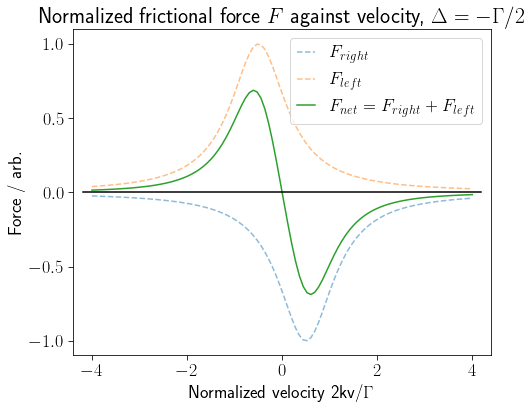

In [63]:
plt.figure(figsize=(7.5,6))
plt.plot(norm_v,F_right_normed,'--',alpha=0.5,label=r'$F_{right}$')
plt.plot(norm_v,F_left_normed,'--',alpha=0.5,label=r'$F_{left}$')
plt.plot(norm_v,F_net_normed,label=r'$F_{net}=F_{right}+F_{left}$')
plt.yticks(np.arange(-1, 1.5, step=0.5))

plt.ylabel('Force / arb.')
plt.xlabel(r'Normalized velocity 2kv/$\Gamma$')

plt.axhline(0.0,0.025,0.975,linestyle='-',color='black')
# plt.axvline(0.0,0.025,0.975,linestyle='-',color='black')

plt.title(r'Normalized frictional force $F$ against velocity, $\Delta=-\Gamma/2$')
plt.legend()

plt.savefig('Optical Molasses'+'.pdf',bbox_inches='tight',dpi=300)

# plt.show()